In [1]:
# Clustering algorithms
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import vq, kmeans, whiten

# Data Manipulation
import matplotlib.pyplot as plt, numpy as np

# Standarize data
from sklearn.preprocessing import StandardScaler

# Data Visualization
import seaborn as sns, pandas as pd

In [2]:
# Import data from datasets
df = pd.read_csv('~/DevSpace/Data-Snippets/MachineLearning/datasets/ansur.csv')

# Remove redundant column
df = df.drop(['body_height'], axis=1)

# Get dummies for Gender column
df = pd.get_dummies(df)

# Scale data with Standard Scaling
scaled_data = StandardScaler().fit_transform(df)

# First rows of df
df = pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,weight_kg,stature_m,Gender_Female,Gender_Male
0,0.294572,0.917699,-1.0,1.0
1,-0.310201,0.092250,-1.0,1.0
2,1.069224,0.460355,-1.0,1.0
3,0.151873,-0.432022,-1.0,1.0
4,1.184742,2.457051,-1.0,1.0


In [3]:
# Calculate linkage matrix with 'ward' method
distance_matrix = linkage(df, method='ward')

# Add clustered column with new label
df['hierarchy'] = fcluster(distance_matrix, 2, criterion='maxclust')

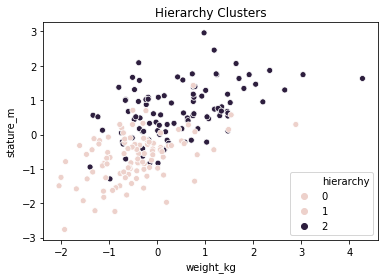

In [4]:
# Visualize Hierarchy Clusters
sns.scatterplot(x='weight_kg', y='stature_m', hue='hierarchy', data=df)
plt.title('Hierarchy Clusters')
plt.show()

In [5]:
# Calculate Centroids with kmeans and add labels to df
centroids, distortion = kmeans(df, 2)
df['kmeans'], df['distortion'] = vq(df, centroids)

# Mean centroids in k-means
df[['weight_kg', 'stature_m', 'kmeans']].groupby('kmeans').mean()

,weight_kg,stature_m
kmeans,,
0,-0.454802,-0.672518
1,0.454802,0.672518


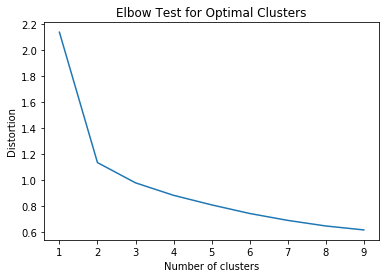

In [6]:
# Elbow method to determine optimal number of clusters
num_clusts = range(1, 10)
distortions = [kmeans(df, i)[1] for i in num_clusts]
sns.lineplot(num_clusts, distortions)
plt.title('Elbow Test for Optimal Clusters')
plt.ylabel('Distortion')
plt.xlabel('Number of clusters')
plt.show()

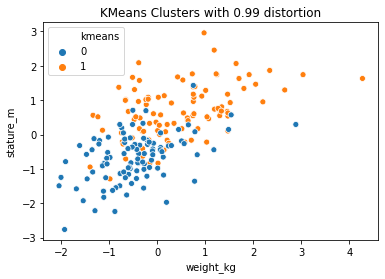

In [7]:
# Visualize Kmeans Clusters
sns.scatterplot(x='weight_kg', y='stature_m', hue='kmeans', data=df)
plt.title(f'KMeans Clusters with {round(distortion, 2)} distortion')
plt.show()


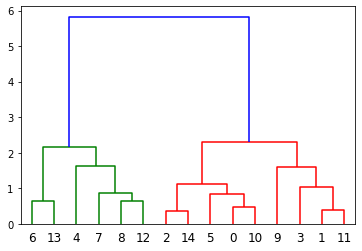

In [8]:
# Dendrograms are used visualizations to predict optimal number of clusters
distance_matrix = linkage(df.head(15), method='ward', metric='euclidean')
dn = dendrogram(distance_matrix)
plt.show()